In [17]:
import random
import time

import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf

%matplotlib inline

from joblib import dump, load
import itertools
import json
import math
import os
import random
import time
from typing import Callable, Dict, List

from hyperopt import fmin, hp, tpe, Trials, STATUS_OK
from hyperopt.pyll.base import scope
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import norm

# scikit-learn
import sklearn
from sklearn.base import clone
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, average_precision_score, confusion_matrix, \
    f1_score, fbeta_score, log_loss, make_scorer, mean_squared_error, precision_recall_fscore_support, \
    precision_score, precision_recall_curve, recall_score
from sklearn.model_selection import cross_validate, train_test_split, StratifiedKFold, StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.svm import SVC

# statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Models
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBClassifier, XGBRegressor

# NLP
import gc
import re
import string
import operator
from collections import defaultdict


# Configure options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

random_seed = 1
random.seed(random_seed)
np.random.seed(random_seed)
tf.random.set_seed(random_seed)

In [34]:
data = [
    (0.798, 0),
 (0.751, 0),
 (0.239, 1),
 (0.689, 0),
 (0.368, 0),
 (0.045, 1),
 (0.317, 1),
 (0.299, 1),
 (0.644, 0),
 (0.142, 1),
 (0.917, 1),
 (0.951, 1),
 (0.086, 1),
 (0.413, 0),
 (0.038, 1),
 (0.731, 0),
 (0.869, 1),
 (0.387, 1),
 (0.123, 1),
 (0.107, 1),
 (0.918, 1),
 (0.453, 1),
 (0.555, 1),
 (0.514, 1),
 (0.386, 1),
 (0.798, 0),
 (0.263, 1),
 (0.154, 1),
 (0.724, 0),
 (0.817, 0),
 (0.442, 1),
 (0.538, 1),
 (0.905, 1),
 (0.03, 0),
 (0.808, 0),
 (0.878, 1),
 (0.408, 1),
 (0.34, 1),
 (0.305, 1),
 (0.227, 1),
 (0.719, 0),
 (0.315, 1),
 (0.576, 1),
 (0.118, 1),
 (0.98, 0),
 (0.396, 1),
 (0.794, 0),
 (0.098, 1),
 (0.768, 0),
 (0.994, 0),
 (0.602, 1),
 (0.803, 0),
 (0.783, 0),
 (0.118, 1),
 (0.972, 1),
 (0.372, 1),
 (0.503, 1),
 (0.032, 1),
 (0.203, 1),
 (0.852, 0),
 (0.662, 0),
 (0.702, 0),
 (0.384, 1),
 (0.457, 0),
 (0.625, 1),
 (0.341, 1),
 (0.976, 1),
 (0.448, 1),
 (0.572, 1),
 (0.502, 1),
 (0.31, 1),
 (0.705, 0),
 (0.508, 1),
 (0.514, 1),
 (0.129, 1),
 (0.211, 1),
 (0.721, 0),
 (0.67, 0),
 (0.151, 1),
 (0.286, 1),
 (0.378, 1),
 (0.654, 0),
 (0.115, 1),
 (0.596, 1),
 (0.394, 1),
 (0.436, 1),
 (0.838, 0),
 (0.37, 1),
 (0.184, 1),
 (0.495, 0),
 (0.653, 0),
 (0.456, 1),
 (0.236, 1),
 (0.978, 1),
 (0.486, 1),
 (0.168, 1),
 (0.298, 1),
 (0.143, 1),
 (0.898, 1),
 (0.527, 1),
 (0.798, 0),
 (0.751, 0),
 (0.239, 1),
 (0.689, 0),
 (0.368, 0),
 (0.045, 1),
 (0.317, 1),
 (0.299, 1),
 (0.644, 0),
 (0.142, 1),
 (0.917, 1),
 (0.951, 1),
 (0.086, 1),
 (0.413, 0),
 (0.038, 1),
 (0.731, 0),
 (0.869, 1),
 (0.387, 1),
 (0.123, 1),
 (0.107, 1),
 (0.918, 1),
 (0.453, 1),
 (0.555, 1),
 (0.514, 1),
 (0.386, 1),
 (0.798, 0),
 (0.263, 1),
 (0.154, 1),
 (0.724, 0),
 (0.817, 0),
 (0.442, 1),
 (0.538, 1),
 (0.905, 1),
 (0.03, 0),
 (0.808, 0),
 (0.878, 1),
 (0.408, 1),
 (0.34, 1),
 (0.305, 1),
 (0.227, 1),
 (0.719, 0),
 (0.315, 1),
 (0.576, 1),
 (0.118, 1),
 (0.98, 0),
 (0.396, 1),
 (0.794, 0),
 (0.098, 1),
 (0.768, 0),
 (0.994, 0),
 (0.602, 1),
 (0.803, 0),
 (0.783, 0),
 (0.118, 1),
 (0.972, 1),
 (0.372, 1),
 (0.503, 1),
 (0.032, 1),
 (0.203, 1),
 (0.852, 0),
 (0.662, 0),
 (0.702, 0),
 (0.384, 1),
 (0.457, 0),
 (0.625, 1),
 (0.341, 1),
 (0.976, 1),
 (0.448, 1),
 (0.572, 1),
 (0.502, 1),
 (0.31, 1),
 (0.705, 0),
 (0.508, 1),
 (0.514, 1),
 (0.129, 1),
 (0.211, 1),
 (0.721, 0),
 (0.67, 0),
 (0.151, 1),
 (0.286, 1),
 (0.378, 1),
 (0.654, 0),
 (0.115, 1),
 (0.596, 1),
 (0.394, 1),
 (0.436, 1),
 (0.838, 0),
 (0.37, 1),
 (0.184, 1),
 (0.495, 0),
 (0.653, 0),
 (0.456, 1),
 (0.236, 1),
 (0.978, 1),
 (0.486, 1),
 (0.168, 1),
 (0.298, 1),
 (0.143, 1),
 (0.898, 1),
 (0.527, 1),
 (0.566, 1),
 (0.913, 1),
 (0.785, 0),
 (0.653, 0),
 (0.089, 1),
 (0.061, 1),
 (0.927, 1),
 (0.451, 1),
 (0.908, 1),
 (0.902, 1),
 (0.79, 0),
 (0.973, 1),
 (0.55, 1),
 (0.252, 1),
 (0.318, 1),
 (0.48, 1),
 (0.299, 1),
 (0.144, 1),
 (0.726, 0),
 (0.01, 1),
 (0.858, 0),
 (0.231, 1),
 (0.435, 1),
 (0.016, 1),
 (0.666, 0),
 (0.178, 1),
 (0.812, 0),
 (0.464, 1),
 (0.504, 1),
 (0.749, 0),
 (0.504, 1),
 (0.513, 1),
 (0.057, 1),
 (0.628, 1),
 (0.751, 0),
 (0.616, 1),
 (0.364, 1),
 (0.084, 1),
 (0.895, 1),
 (0.198, 1),
 (0.933, 1),
 (0.852, 0),
 (0.571, 1),
 (0.862, 1),
 (0.924, 1),
 (0.263, 1),
 (0.26, 1),
 (0.319, 1),
 (0.778, 0),
 (0.779, 0),
 (0.413, 1),
 (0.292, 1),
 (0.756, 0),
 (0.253, 0),
 (0.594, 1),
 (0.683, 0),
 (0.585, 1),
 (0.581, 1),
 (0.254, 1),
 (0.114, 1),
 (0.23, 1),
 (0.719, 0),
 (0.679, 0),
 (0.564, 0),
 (0.631, 1),
 (0.538, 0),
 (0.939, 1),
 (0.268, 1),
 (0.489, 1),
 (0.223, 1),
 (0.696, 0),
 (0.989, 1),
 (0.426, 1),
 (0.666, 0),
 (0.64, 0),
 (0.287, 1),
 (0.218, 1),
 (0.959, 1),
 (0.927, 1),
 (0.541, 1),
 (0.489, 0),
 (0.982, 1),
 (0.36, 1),
 (0.969, 1),
 (0.976, 1),
 (0.948, 1),
 (0.106, 1),
 (0.643, 0),
 (0.668, 0),
 (0.205, 0),
 (0.229, 1),
 (0.585, 1),
 (0.866, 1),
 (0.122, 1),
 (0.591, 0),
 (0.957, 1),
 (0.74, 0),
 (0.4, 1),
 (0.779, 0),
 (0.014, 0),
    (0.979, 1),
 (0.395, 1),
 (0.238, 1),
 (0.512, 1),
 (0.208, 1),
 (0.115, 1),
 (0.507, 1),
 (0.74, 0),
 (0.089, 1),
 (0.662, 0),
 (0.959, 1),
 (0.962, 1),
 (0.099, 1),
 (0.071, 1),
 (0.553, 1),
 (0.993, 1),
 (0.874, 1),
 (0.617, 1),
 (0.531, 1),
 (0.794, 0),
 (0.371, 1),
 (0.507, 1),
 (0.419, 1),
 (0.961, 1),
 (0.177, 1),
 (0.835, 0),
 (0.419, 1),
 (0.255, 0),
 (0.378, 1),
 (0.554, 1),
 (0.877, 0),
 (0.719, 0),
 (0.603, 1),
 (0.575, 1),
 (0.324, 1),
 (0.768, 0),
 (0.593, 1),
 (0.469, 1),
 (0.288, 0),
 (0.729, 0),
 (0.003, 0),
 (0.328, 1),
 (0.992, 1),
 (0.745, 0),
 (0.082, 1),
 (0.544, 1),
 (0.812, 0),
 (0.964, 1),
 (0.731, 0),
 (0.41, 0),
 (0.87, 1),
 (0.566, 1),
 (0.021, 0),
 (0.102, 1),
 (0.484, 1),
 (0.282, 1),
 (0.425, 1),
 (0.285, 1),
 (0.8, 0),
 (0.426, 1),
 (0.099, 1),
 (0.775, 0),
 (0.204, 1),
 (0.809, 0),
 (0.948, 1),
 (0.561, 1),
 (0.969, 1),
 (0.166, 1),
 (0.416, 1),
 (0.71, 0),
 (0.465, 1),
 (0.009, 1),
 (0.597, 0),
 (0.316, 1),
 (0.851, 0),
 (0.328, 1),
 (0.773, 0),
 (0.256, 1),
 (0.739, 0),
 (0.247, 1),
 (0.851, 0),
 (0.251, 1),
 (0.773, 0),
 (0.747, 0),
 (0.766, 0),
 (0.259, 1),
 (0.329, 1),
 (0.585, 1),
 (0.272, 0),
 (0.618, 1),
 (0.948, 1),
 (0.533, 1),
 (0.647, 0),
 (0.689, 0),
 (0.741, 0),
 (0.78, 0),
 (0.996, 1),
 (0.529, 1),
 (0.949, 0),
 (0.082, 1),
 (0.85, 0),
 (0.752, 0),
 (0.711, 0),
 (0.775, 0),
 (0.888, 1),
 (0.595, 1),
 (0.224, 1),
 (0.188, 1),
 (0.239, 1),
 (0.846, 0),
 (0.318, 1),
 (0.16, 1),
 (0.947, 1),
 (0.709, 0),
 (0.959, 1),
 (0.427, 1),
 (0.666, 0),
 (0.634, 1),
 (0.454, 1),
 (0.756, 0),
 (0.412, 1),
 (0.244, 1),
 (0.455, 1),
 (0.656, 0),
 (0.05, 1),
 (0.782, 0),
 (0.252, 1),
 (0.301, 1),
 (0.559, 1),
 (0.806, 0),
 (0.783, 0),
 (0.954, 1),
 (0.488, 1),
 (0.613, 1),
 (0.308, 1),
 (0.475, 1),
 (0.117, 1),
 (0.413, 1),
 (0.676, 0),
 (0.04, 1),
 (0.943, 1),
 (0.118, 1),
 (0.187, 1),
 (0.282, 1),
 (0.852, 0),
 (0.69, 0),
 (0.357, 0),
 (0.564, 1),
 (0.151, 1),
 (0.169, 1),
 (0.302, 1),
 (0.957, 1),
 (0.957, 1),
 (0.682, 0),
 (0.938, 0),
 (0.616, 1),
 (0.806, 0),
 (0.427, 1),
 (0.626, 1),
 (0.586, 1),
 (0.109, 1),
 (0.553, 1),
 (0.399, 1),
 (0.113, 1),
 (0.302, 1),
 (0.596, 0),
 (0.088, 1),
 (0.435, 0),
 (0.254, 1),
 (0.861, 0),
 (0.832, 0),
 (0.934, 1),
 (0.728, 0),
 (0.726, 0),
 (0.335, 1),
 (0.333, 1),
 (0.288, 0),
 (0.079, 1),
 (0.921, 0),
 (0.538, 1),
 (0.643, 0),
 (0.516, 1),
 (0.689, 0),
 (0.143, 1),
 (0.061, 1),
 (0.846, 0),
 (0.888, 1),
 (0.254, 1),
 (0.437, 0),
 (0.769, 0),
 (0.611, 1),
 (0.242, 1),
 (0.592, 1),
 (0.663, 0),
 (0.643, 0),
 (0.492, 1),
 (0.224, 0),
 (0.849, 0),
 (0.521, 1),
 (0.516, 1),
 (0.706, 0),
 (0.64, 0),
 (0.755, 0),
 (0.13, 1),
 (0.318, 1),
 (0.701, 0),
 (0.684, 0),
 (0.371, 1),
 (0.196, 1),
 (0.595, 1),
 (0.498, 1),
 (0.162, 1),
 (0.961, 1),
 (0.037, 0),
 (0.872, 1),
 (0.16, 1),
 (0.447, 1),
 (0.196, 1),
 (0.615, 0),
 (0.215, 1),
 (0.709, 0),
 (0.835, 0),
 (0.266, 1),
 (0.789, 0),
 (0.329, 1),
 (0.12, 1),
 (0.614, 1),
 (0.902, 0),
 (0.415, 1),
 (0.686, 0),
 (0.107, 1),
 (0.661, 0),
 (0.857, 0),
 (0.499, 1),
 (0.638, 1),
 (0.441, 1),
 (0.806, 0),
 (0.925, 1),
 (0.037, 1),
 (0.747, 0),
 (0.092, 1),
 (0.898, 1),
 (0.752, 0),
 (0.454, 1),
 (0.673, 0),
 (0.06, 1),
 (0.619, 1),
 (0.308, 1),
 (0.203, 1),
 (0.908, 0),
 (0.267, 1),
 (0.348, 1),
 (0.296, 1),
 (0.955, 1),
 (0.325, 1),
 (0.281, 1),
 (0.92, 1),
 (0.56, 1),
 (0.64, 0),
 (0.571, 1),
 (0.136, 1),
 (0.254, 1),
 (0.976, 0),
 (0.411, 0),
 (0.667, 0),
 (0.731, 0),
 (0.842, 0),
 (0.995, 1),
 (0.885, 1),
 (0.434, 0),
 (0.403, 1),
 (0.56, 1),
 (0.558, 1),
 (0.996, 1),
 (0.357, 1),
 (0.255, 1),
 (0.597, 1),
 (0.251, 1),
 (0.575, 0),
 (0.465, 1),
 (0.142, 1),
 (0.38, 1),
 (0.796, 0),
 (0.067, 1),
 (0.942, 1),
 (0.817, 0),
 (0.427, 1),
 (0.771, 0),
 (0.648, 0),
 (0.575, 1),
 (0.415, 1),
 (0.802, 0),
 (0.584, 1),
 (0.816, 0),
 (0.248, 1),
 (0.333, 1),
 (0.486, 1),
 (0.698, 0),
 (0.137, 1),
 (0.904, 1)]

In [42]:
df = pd.DataFrame(data, columns=['feature', 'class'])

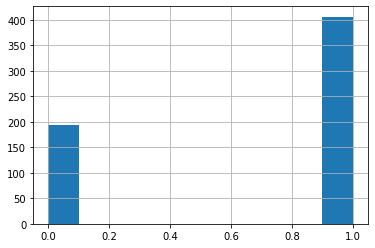

In [43]:
df['class'].hist()

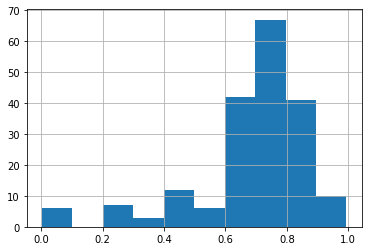

In [52]:
df[df['class'] == 0]['feature'].hist()

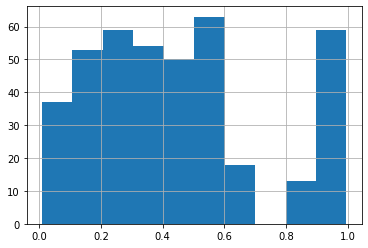

In [53]:
df[df['class'] == 1]['feature'].hist()

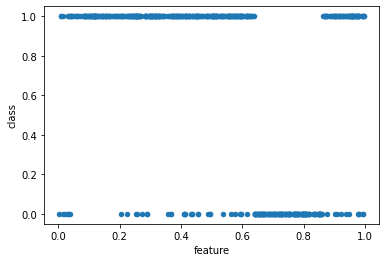

In [44]:
df.plot(x='feature', y='class', kind='scatter')

In [45]:
len(df)

600

In [46]:
df['class'].sum() / len(df)

0.6766666666666666

In [57]:
X = df['feature'].values.reshape(-1, 1)
y = df['class'].values

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4d9c68c160>]],
      dtype=object)

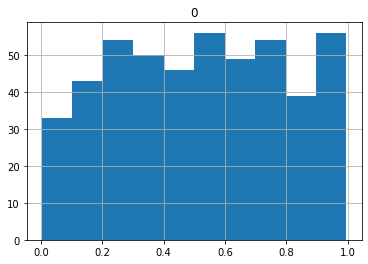

In [72]:
pd.DataFrame(X_train).hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4d8273b1d0>]],
      dtype=object)

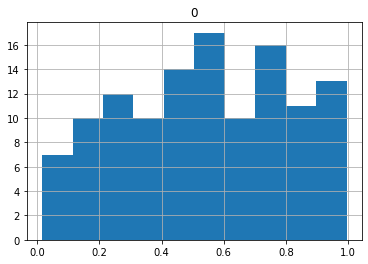

In [73]:
pd.DataFrame(X_test).hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4d825af0b8>]],
      dtype=object)

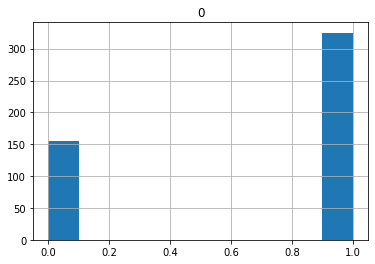

In [74]:
pd.DataFrame(y_train).hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4d8278b668>]],
      dtype=object)

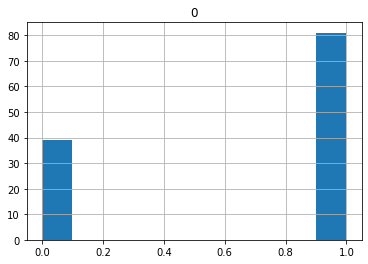

In [75]:
pd.DataFrame(y_test).hist()

In [89]:
from sklearn.linear_model import LogisticRegression

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_seed)
clf = LogisticRegression()
scoring = {
    'precision': 'precision',
    'recall': 'recall',    
}
results = cross_validate(clf, X_train, y_train, scoring=scoring, cv=cv)

In [90]:
results

{'fit_time': array([0.00563669, 0.0037725 , 0.00558949, 0.00527883, 0.00335407]),
 'score_time': array([0.00431347, 0.00233579, 0.00347328, 0.00254965, 0.00292039]),
 'test_precision': array([0.69620253, 0.6835443 , 0.6625    , 0.68055556, 0.67058824]),
 'test_recall': array([0.84615385, 0.83076923, 0.81538462, 0.75384615, 0.87692308])}

In [91]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
clf.predict_proba(X_train)[:, 1]

array([0.82357364, 0.49352126, 0.61903798, 0.73449356, 0.41742874,
       0.77180798, 0.48022933, 0.52969657, 0.55901494, 0.53852299,
       0.56047182, 0.68971775, 0.6651819 , 0.71383496, 0.86216516,
       0.56192766, 0.54146004, 0.48022933, 0.80940648, 0.75087143,
       0.63012719, 0.36469689, 0.63150401, 0.82613589, 0.63219162,
       0.91530849, 0.41527382, 0.44132397, 0.46917326, 0.88616294,
       0.70469231, 0.57281085, 0.88345151, 0.8593308 , 0.66583991,
       0.38898599, 0.70469231, 0.84364359, 0.52969657, 0.39039203,
       0.78104317, 0.6232117 , 0.83730301, 0.52453888, 0.42897311,
       0.77645953, 0.71141354, 0.57570162, 0.66781009, 0.87465524,
       0.67563174, 0.51051619, 0.40241489, 0.69538222, 0.77645953,
       0.6259841 , 0.55025313, 0.86904148, 0.75526878, 0.49943284,
       0.39603424, 0.52748685, 0.60641307, 0.50386672, 0.6618822 ,
       0.90718538, 0.46402344, 0.50756119, 0.78003046, 0.82141584,
       0.89424929, 0.83527955, 0.7385091 , 0.3917999 , 0.38128

In [85]:
clf.coef_

array([[-2.95597324]])

In [94]:
y_train_pred_probas = clf.predict_proba(X_train)[:, 1]

In [93]:
def get_precision_recall_df(y_actual, y_pred_probas):
    precision, recall, thresholds = precision_recall_curve(y_actual, y_pred_probas)
    df = pd.DataFrame({'precision': precision[:-1], 'recall': recall[:-1], 'threshold': thresholds}).sort_values(
        by='threshold')
    return df


def plot_precision_recall_threshold(y_actual, y_pred_probas):
    precision, recall, thresholds = precision_recall_curve(y_actual, y_pred_probas)
    precision = precision[:-1]
    recall = recall[:-1]
    df = pd.concat([
        pd.DataFrame({'stat_name': ['precision' for _ in range(len(precision))],
                      'stat_value': precision,
                      'threshold': thresholds}),
        pd.DataFrame({'stat_name': ['recall' for _ in range(len(precision))],
                      'stat_value': recall,
                      'threshold': thresholds})
    ])

    ax = sns.lineplot(y=df['stat_value'], x=df['threshold'], hue=df['stat_name'],
                      palette={'precision': 'red', 'recall': 'blue'})
    ax.set_title('Precision/Recall per Threshold')
    return ax

In [95]:
get_precision_recall_df(y_train, y_train_pred_probas)

,precision,recall,threshold
0,0.677083,1.000000,0.364697
1,0.675732,0.993846,0.366068
2,0.678571,0.993846,0.366754
3,0.677895,0.990769,0.367441
4,0.677215,0.987692,0.369504
5,0.676533,0.984615,0.374338
6,0.675847,0.981538,0.375723
7,0.678723,0.981538,0.377111
8,0.678038,0.978462,0.378501
9,0.678112,0.972308,0.380589


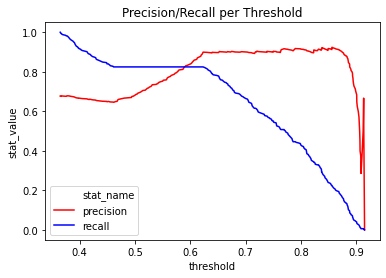

In [96]:
plot_precision_recall_threshold(y_train, y_train_pred_probas)

In [98]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_seed)
clf = XGBClassifier()
scoring = {
    'precision': 'precision',
    'recall': 'recall',    
}
results = cross_validate(clf, X_train, y_train, scoring=scoring, cv=cv)
results

{'fit_time': array([0.02184319, 0.01912689, 0.0173974 , 0.01510644, 0.01433921]),
 'score_time': array([0.00329924, 0.0031395 , 0.00197077, 0.00170135, 0.00198174]),
 'test_precision': array([0.90769231, 0.90909091, 0.88571429, 0.91428571, 0.94029851]),
 'test_recall': array([0.90769231, 0.92307692, 0.95384615, 0.98461538, 0.96923077])}

In [100]:
clf = XGBClassifier()
clf.fit(X_train, y_train)
y_train_pred_probas = clf.predict_proba(X_train)[:, 1]

In [101]:
get_precision_recall_df(y_train, y_train_pred_probas)

,precision,recall,threshold
0,0.925926,1.000000,0.341711
1,0.931034,0.996923,0.349131
2,0.938776,0.990769,0.431834
3,0.941520,0.990769,0.444912
4,0.944282,0.990769,0.450819
5,0.947059,0.990769,0.478994
6,0.949853,0.990769,0.485000
7,0.952663,0.990769,0.504209
8,0.955490,0.990769,0.506444
9,0.958333,0.990769,0.542712


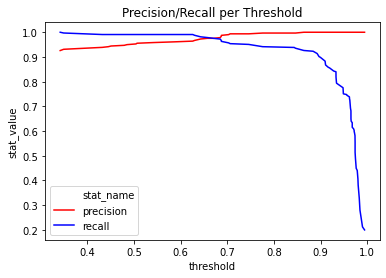

In [102]:
plot_precision_recall_threshold(y_train, y_train_pred_probas)